In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = 'temp_100mV'
data = pd.read_excel(f'{file_name}.xlsx')
scan_rate = 100     # mV/s unit
data.head()

,1,2,3,4,5,6,7,8,9,10
0,0.238924,3820.310810,0.256965,10191.746129,0.162949,8672.047647,0.334782,6722.493833,-0.198841,-1684.094980
1,0.239431,3829.518465,0.257479,10206.616341,0.163478,8686.698356,0.335401,6725.532982,-0.197846,-1533.459148
2,0.240440,3843.800012,0.258515,10228.012760,0.164478,8711.478781,0.336390,6734.282642,-0.196838,-1405.025788
3,0.241440,3858.764373,0.259503,10253.315651,0.165461,8739.931503,0.337380,6736.151218,-0.195839,-1294.354332
4,0.242432,3873.710850,0.260503,10274.963471,0.166471,8764.879359,0.338396,6742.317364,-0.194850,-1196.999032


5


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


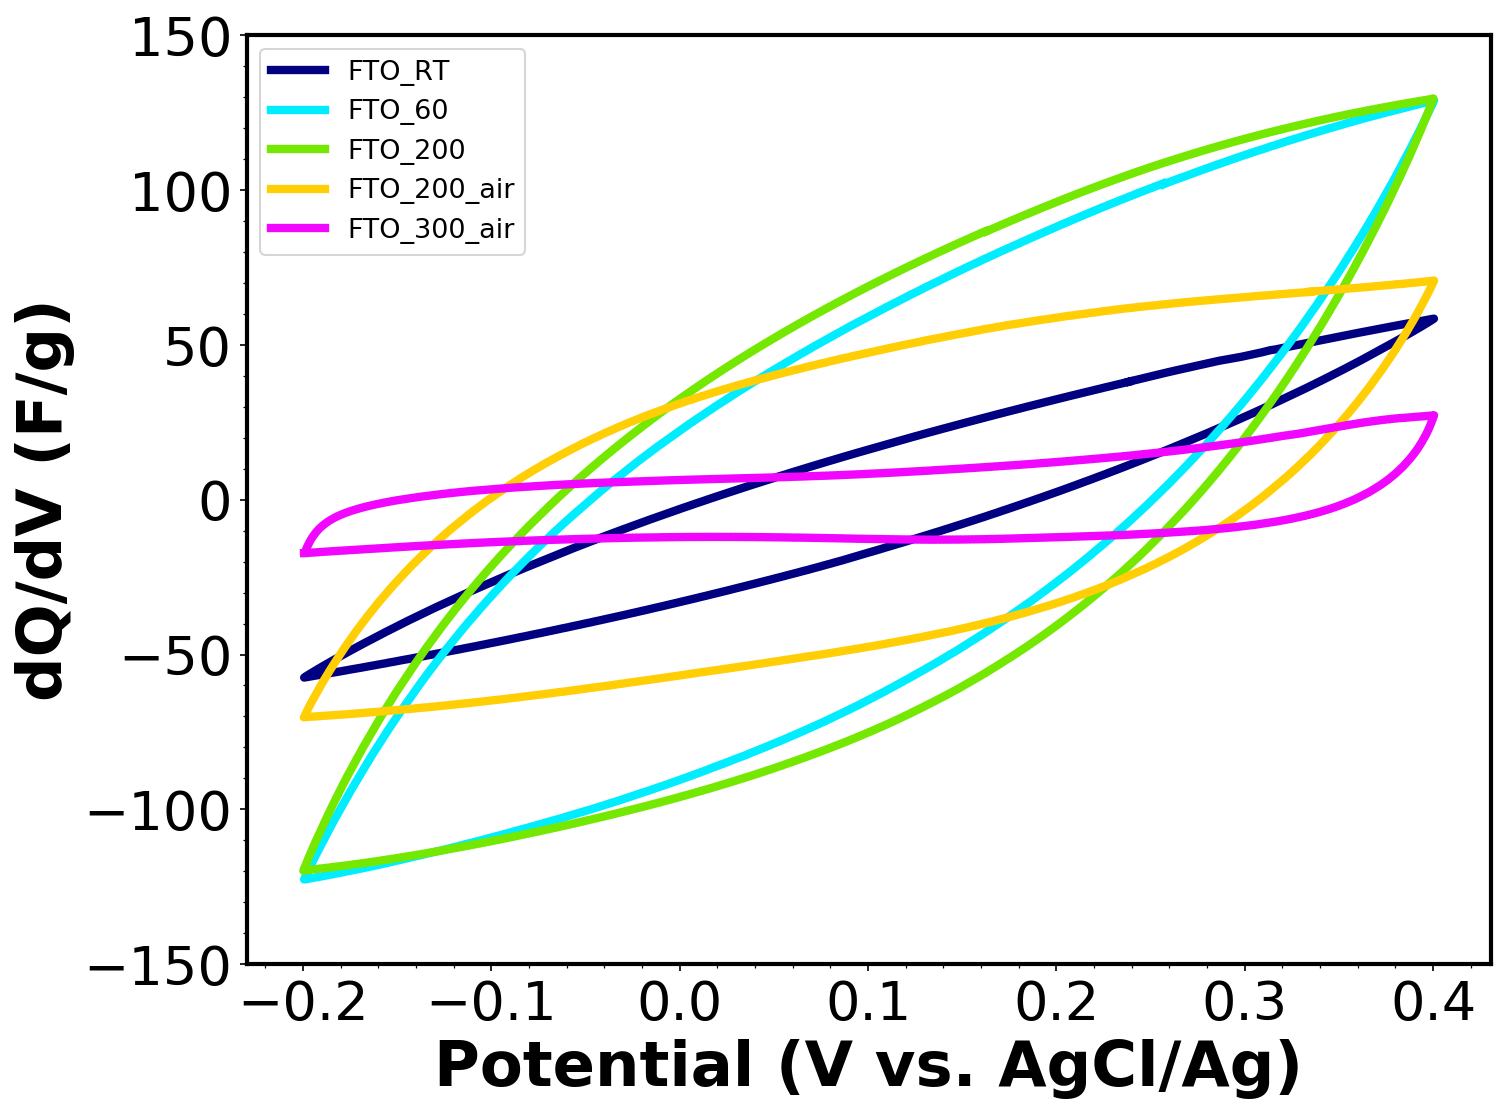

In [14]:
fig, ax = plt.subplots(figsize=(10.7, 8.2), dpi=150)
label = [ 'FTO_RT', 'FTO_60', 'FTO_200', 'FTO_200_air', 'FTO_300_air']
c = 0.1

for i in range(0, len(label)*2 - 1, 2):
    c +=0.25
    ax.plot(np.array(data.iloc[:, i]),
            np.array(data.iloc[:, i+1])/int(scan_rate),
            linewidth = 4,
            label = label[int(i/2)])

print(len(ax.lines))    
colormap = plt.cm.gist_ncar  
colors = [colormap(i) for i in np.linspace(0, 1, len(ax.lines)/2.7 + 5)]  #change here

for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
    
ax.legend(loc = 'upper left', fontsize = 13)
plt.xlabel('Potential (V vs. AgCl/Ag)', fontsize = 30, weight = 'bold')
plt.ylabel('dQ/dV (F/g)', fontsize = 30, weight = 'bold')

#plt.text(0.03, 1100, file_name, fontsize = 22, color = 'red')

ax.xaxis.set_tick_params(labelsize=26)
ax.yaxis.set_tick_params(labelsize=26)
plt.minorticks_on()

ax.set_ylim(-150, 150)

ax.spines["bottom"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

plt.savefig(f'CV_{file_name}.tif', bbox_inches = 'tight')

plt.show()